In [3]:
library(devtools)
install_github("hadley/readr")
install_github("ropenscilabs/jsonvalidate")
install_github("frictionlessdata/datapackage-r")

Skipping install of 'readr' from a github remote, the SHA1 (6eec5fc8) has not changed since last install.
  Use `force = TRUE` to force installation
Skipping install of 'jsonvalidate' from a github remote, the SHA1 (9dfe7f1a) has not changed since last install.
  Use `force = TRUE` to force installation
Skipping install of 'datapkg' from a github remote, the SHA1 (65261c9e) has not changed since last install.
  Use `force = TRUE` to force installation


In [4]:
setwd('/Users/dan/open_knowledge/datasets/finance-vix')
list.files("data")

[1] "vix-daily.csv"

In [5]:
volatility_raw <- read.csv("data/vix-daily.csv")

In [6]:
head(volatility_raw)

,Date,VIXOpen,VIXHigh,VIXLow,VIXClose
1,1/2/2004,17.96,18.68,17.54,18.22
2,1/5/2004,18.45,18.49,17.44,17.49
3,1/6/2004,17.66,17.67,16.19,16.73
4,1/7/2004,16.72,16.75,15.5,15.5
5,1/8/2004,15.42,15.68,15.32,15.61
6,1/9/2004,16.15,16.88,15.57,16.75


'data.frame':	3122 obs. of  5 variables:
 $ Date    : Factor w/ 3122 levels "01/02/2014","01/02/2015",..: 543 644 652 659 666 672 493 501 508 515 ...
 $ VIXOpen : num  18 18.4 17.7 16.7 15.4 ...
 $ VIXHigh : num  18.7 18.5 17.7 16.8 15.7 ...
 $ VIXLow  : num  17.5 17.4 16.2 15.5 15.3 ...
 $ VIXClose: num  18.2 17.5 16.7 15.5 15.6 ...


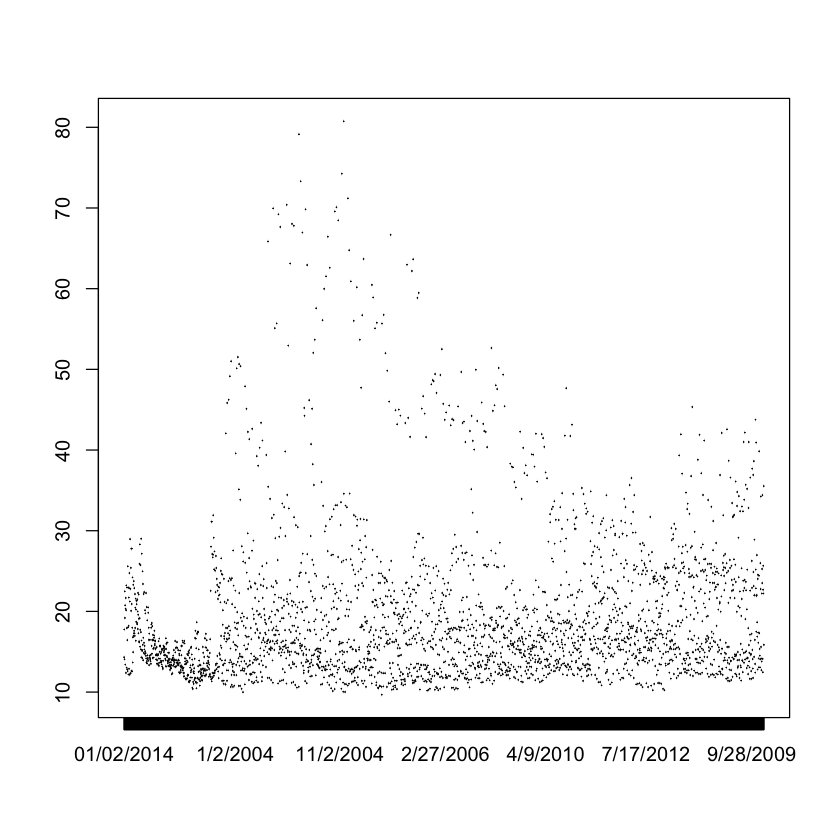

In [7]:
str(volatility_raw)
plot(volatility_raw$Date, volatility_raw$VIXOpen, type='l')

In [8]:
volatility_raw$Date <- as.Date(volatility_raw$Date, "%m/%d/%Y")
str(volatility_raw)


'data.frame':	3122 obs. of  5 variables:
 $ Date    : Date, format: "2004-01-02" "2004-01-05" ...
 $ VIXOpen : num  18 18.4 17.7 16.7 15.4 ...
 $ VIXHigh : num  18.7 18.5 17.7 16.8 15.7 ...
 $ VIXLow  : num  17.5 17.4 16.2 15.5 15.3 ...
 $ VIXClose: num  18.2 17.5 16.7 15.5 15.6 ...


In [9]:
list.files()

[1] "#datapackage.json#" "archive"            "data"              
[4] "datapackage.json"   "README.md"          "scripts"

In [10]:
library(datapkg)
volatility <- datapkg_read()

Reading file /Users/dan/open_knowledge/datasets/finance-vix/data/vix-daily.csv


In [13]:
volatility$title
volatility$homepage

[1] "VIX - CBOE Volatility Index"

[1] "http://www.cboe.com/micro/VIX/"

In [17]:
str(volatility$data$`vix-daily`)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	3122 obs. of  5 variables:
 $ Date    : Date, format: "2004-01-02" "2004-01-05" ...
 $ VIXOpen : num  18 18.4 17.7 16.7 15.4 ...
 $ VIXHigh : num  18.7 18.5 17.7 16.8 15.7 ...
 $ VIXLow  : num  17.5 17.4 16.2 15.5 15.3 ...
 $ VIXClose: num  18.2 17.5 16.7 15.5 15.6 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 5
  .. ..$ Date    :List of 1
  .. .. ..$ format: chr "%m/%d/%Y"
  .. .. ..- attr(*, "class")= chr  "collector_date" "collector"
  .. ..$ VIXOpen : list()
  .. .. ..- attr(*, "class")= chr  "collector_number" "collector"
  .. ..$ VIXHigh : list()
  .. .. ..- attr(*, "class")= chr  "collector_number" "collector"
  .. ..$ VIXLow  : list()
  .. .. ..- attr(*, "class")= chr  "collector_number" "collector"
  .. ..$ VIXClose: list()
  .. .. ..- attr(*, "class")= chr  "collector_number" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [13]:
head(volatility$data$`vix-daily`)

,Date,VIXOpen,VIXHigh,VIXLow,VIXClose
1,12419.00,17.96,18.68,17.54,18.22
2,12422.00,18.45,18.49,17.44,17.49
3,12423.00,17.66,17.67,16.19,16.73
4,12424.00,16.72,16.75,15.50,15.50
5,12425.00,15.42,15.68,15.32,15.61
6,12426.00,16.15,16.88,15.57,16.75


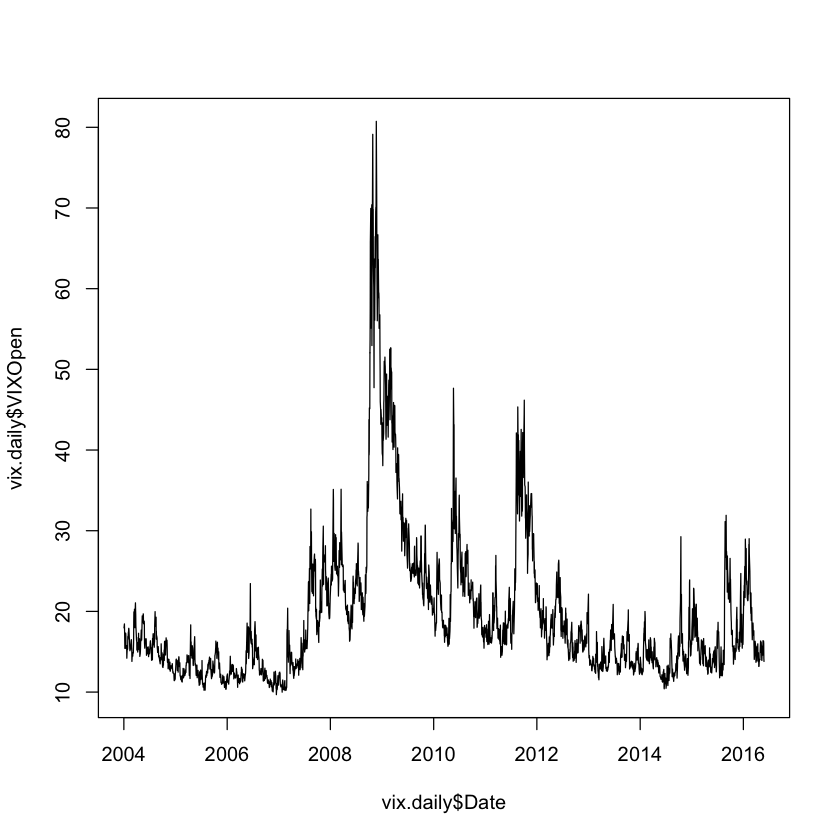

In [14]:
vix.daily = volatility$data$`vix-daily`
plot(vix.daily$Date, vix.daily$VIXOpen, type='l')

In [68]:
mk <- within(volatility$data$`vix-daily`,
            {
                VIXDiff <- VIXHigh - VIXLow
            })

In [69]:
mk

,Date,VIXOpen,VIXHigh,VIXLow,VIXClose,VIXDiff
1,2004-01-02,17.96,18.68,17.54,18.22,1.14
2,2004-01-05,18.45,18.49,17.44,17.49,1.05
3,2004-01-06,17.66,17.67,16.19,16.73,1.48
4,2004-01-07,16.72,16.75,15.5,15.5,1.25
5,2004-01-08,15.42,15.68,15.32,15.61,0.359999999999999
6,2004-01-09,16.15,16.88,15.57,16.75,1.31
7,2004-01-12,17.32,17.46,16.79,16.82,0.669999999999998
8,2004-01-13,16.6,18.33,16.53,18.04,1.8
9,2004-01-14,17.29,17.3,16.4,16.75,0.900000000000002
10,2004-01-15,17.07,17.31,15.49,15.56,1.82


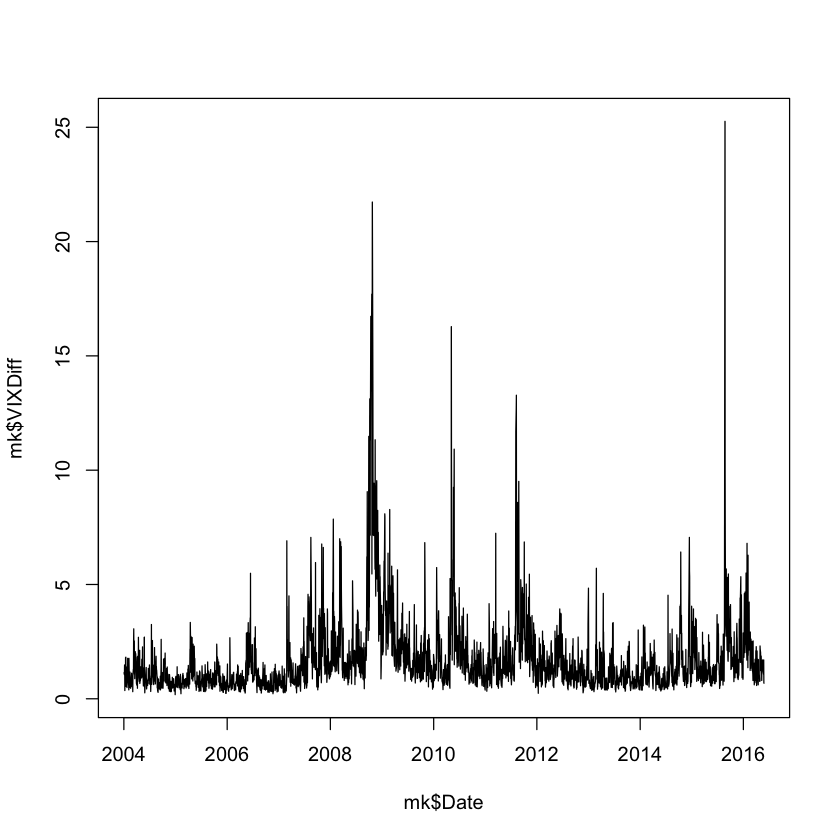

In [71]:
plot(mk$Date, mk$VIXDiff, type='l')

In [74]:
pkgdir <- 'mk'

In [75]:
datapkg_write(mk, path = pkgdir)

Creating new mk/datapackage.json


In [76]:
getwd()

[1] "/Users/dan/open_knowledge/datasets/finance-vix"